In [3]:
import sys
import os
from importlib import reload
sys.path.insert(0, '/home/inesmcm/Desktop/projects/ocr-from-scratch/src')

from sklearn.model_selection import train_test_split

import model
import bounding_boxes_utils
import utils

reload(model)
reload(bounding_boxes_utils)
reload(utils)

<module 'utils' from '/home/inesmcm/Desktop/projects/ocr-from-scratch/src/utils.py'>

In [26]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

!tar xvf VOCtrainval_06-Nov-2007.tar
!tar xvf VOCtest_06-Nov-2007.tar

!rm VOCtrainval_06-Nov-2007.tar
!rm VOCtest_06-Nov-2007.tar

--2023-02-16 21:55:54--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  2.39MB/s    in 5m 54s  

2023-02-16 22:01:49 (1.24 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2023-02-16 22:01:49--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================

In [26]:
import os

train_datasets = []
val_datasets = []

with open(os.path.join("/home/inesmcm/Desktop/projects/ocr-from-scratch/src/VOCdevkit", '2007_train.txt'), 'r') as f:
    train_datasets = train_datasets + f.readlines()
with open(os.path.join("/home/inesmcm/Desktop/projects/ocr-from-scratch/src/VOCdevkit", '2007_val.txt'), 'r') as f:
    val_datasets = val_datasets + f.readlines()

X_train = []
Y_train = []

X_val = []
Y_val = []

for item in train_datasets:
  item = item.replace("\n", "").split(" ")
  X_train.append(item[0])
  arr = []
  for i in range(1, len(item)):
    arr.append(item[i])
  Y_train.append(arr)

for item in val_datasets:
  item = item.replace("\n", "").split(" ")
  X_val.append(item[0])
  arr = []
  for i in range(1, len(item)):
    arr.append(item[i])
  Y_val.append(arr)

In [37]:
X_train[:3]

['/home/inesmcm/Desktop/projects/ocr-from-scratch/src/VOCdevkit/VOC2007/JPEGImages/000012.jpg',
 '/home/inesmcm/Desktop/projects/ocr-from-scratch/src/VOCdevkit/VOC2007/JPEGImages/000017.jpg',
 '/home/inesmcm/Desktop/projects/ocr-from-scratch/src/VOCdevkit/VOC2007/JPEGImages/000023.jpg']

In [38]:
Y_train[:3]

[['156,97,351,270,6'],
 ['185,62,279,199,14', '90,78,403,336,12'],
 ['9,230,245,500,1',
  '230,220,334,500,1',
  '2,1,117,369,14',
  '3,2,243,462,14',
  '225,1,334,486,14']]

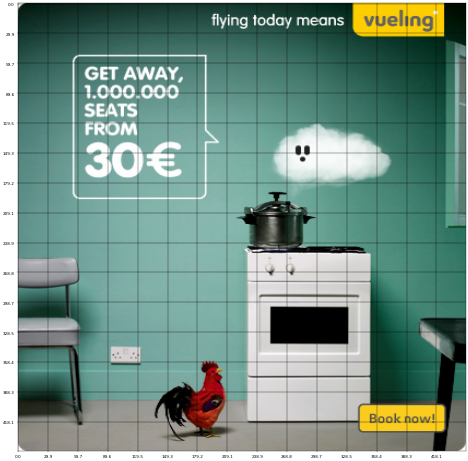

In [19]:
reload(model)

label_path = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/boxes/gt_img_1.txt'
image_dir = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/images'
image, label_matrix = model.read(label_path, image_dir)

In [22]:
IMAGES_LIST_DIR = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/images'
LABELS_LIST_DIR = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/boxes'

image_list = sorted(os.listdir(IMAGES_LIST_DIR))

labels_list = sorted(os.listdir(LABELS_LIST_DIR))

In [23]:
images = {} # dict with name of input images
labels = {} # dict with name of output images

images['train'], images['validation'], labels['train'], labels['validation'] = train_test_split(image_list, labels_list, test_size = 0.25, shuffle = True)

In [29]:
import data_generation

reload(data_generation)
reload(model)
reload(utils)

batch_size = 4
my_training_batch_generator = data_generation.DataGenerator(IMAGES_LIST_DIR, LABELS_LIST_DIR, images['train'], labels['train'], batch_size)

my_validation_batch_generator = data_generation.DataGenerator(IMAGES_LIST_DIR, LABELS_LIST_DIR, images['validation'], labels['validation'], batch_size)

x_train, y_train = my_training_batch_generator.__getitem__(0)
x_val, y_val = my_training_batch_generator.__getitem__(0)
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(4, 448, 448, 3)
(4, 15, 15, 11)
(4, 448, 448, 3)
(4, 15, 15, 11)


In [30]:
model = model.yolov1()

2023-02-19 14:35:15.822052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 14:35:15.826408: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 418, 418, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 418, 418, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 209, 209, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 209, 209, 192)     110784    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 105, 105, 192)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 105, 105, 128)     24704 